In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Read main file - IHME-GBD_2017_DATA-ba7d53b0-1 (without age group)
file = pd.read_excel("Happiness Score/Resources/WHR20_DataForTable2.1.xls")            # Read the file
file.head(1)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-2017, unbalanced panel","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.72359,7.144916,0.450662,50.799999,0.718114,0.178993,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# FUNCTION DEFINITION: function to create DataFrameMatrix with define row_name and col_name 
def matrix_maker_function(dataframe,row_name,col_name,value_name):
    df = dataframe.filter([row_name,col_name,value_name], axis=1)
    matrix_df = pd.pivot_table(df,index=[row_name],values=[value_name],columns=[col_name], aggfunc='sum')             
    matrix_df = pd.DataFrame(matrix_df.to_records())                                  
    matrix_df.columns = [hdr.replace("('", "").replace("', ", "").replace(value_name, "").replace(")", "") \
                     for hdr in matrix_df.columns]
    return matrix_df

In [43]:
#create matrix for HAPPINESS INDEX
df = matrix_maker_function(file ,'Country name','year','Life Ladder')
df.head()

,Country name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
1,Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
2,Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561


In [52]:
df.sort_values(by="2019", ascending=False).set_index('Country name').head(10)

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country name,,,,,,,,,,,,,,,
Finland,NaN,7.672449,NaN,7.670627,NaN,7.393264,7.354225,7.420209,7.444636,7.384571,7.447926,7.659843,7.788252,7.858107,7.780348
Switzerland,NaN,7.473253,NaN,NaN,7.524521,NaN,NaN,7.776209,NaN,7.492804,7.572137,7.458520,7.473593,7.508587,7.694221
Denmark,8.018934,NaN,7.834233,7.970892,7.683359,7.770515,7.788232,7.519909,7.588607,7.507559,7.514425,7.557783,7.593702,7.648786,7.693003
Iceland,NaN,NaN,NaN,6.888284,NaN,NaN,NaN,7.590660,7.501394,NaN,7.498071,7.510035,7.476214,NaN,7.532505
Norway,NaN,7.415682,NaN,7.632288,NaN,NaN,NaN,7.678277,NaN,7.444471,7.603434,7.596332,7.578745,7.444262,7.442140
Netherlands,7.463979,NaN,7.451880,7.631012,NaN,7.501876,7.563798,7.470716,7.406550,7.321188,7.324437,7.540877,7.458965,7.463097,7.425269
Luxembourg,NaN,NaN,NaN,NaN,6.957920,7.097252,7.101400,6.964097,7.130809,6.891127,6.701571,6.967341,7.061381,7.242631,7.404016
Sweden,7.376316,NaN,7.241363,7.515997,7.265977,7.496019,7.382232,7.560148,7.434011,7.239148,7.288922,7.368744,7.286805,7.374792,7.398093
Ireland,NaN,7.144247,NaN,7.568030,7.045911,7.257390,7.006904,6.964645,6.760085,7.018379,6.830125,7.040731,7.060155,6.962336,7.254841


In [5]:
df.isna().sum()

Country name               0
('Life Ladder', 2005)    139
('Life Ladder', 2006)     77
('Life Ladder', 2007)     64
('Life Ladder', 2008)     56
('Life Ladder', 2009)     52
('Life Ladder', 2010)     42
('Life Ladder', 2011)     20
('Life Ladder', 2012)     24
('Life Ladder', 2013)     29
('Life Ladder', 2014)     21
('Life Ladder', 2015)     23
('Life Ladder', 2016)     24
('Life Ladder', 2017)     19
('Life Ladder', 2018)     24
('Life Ladder', 2019)     28
dtype: int64

In [6]:
HappyByYears = df.sort_values(by="('Life Ladder', 2019)", ascending=False).set_index('Country name')
HappyByYears.iloc[:10,6:]

,"('Life Ladder', 2011)","('Life Ladder', 2012)","('Life Ladder', 2013)","('Life Ladder', 2014)","('Life Ladder', 2015)","('Life Ladder', 2016)","('Life Ladder', 2017)","('Life Ladder', 2018)","('Life Ladder', 2019)"
Country name,,,,,,,,,
Finland,7.354225,7.420209,7.444636,7.384571,7.447926,7.659843,7.788252,7.858107,7.780348
Switzerland,NaN,7.776209,NaN,7.492804,7.572137,7.458520,7.473593,7.508587,7.694221
Denmark,7.788232,7.519909,7.588607,7.507559,7.514425,7.557783,7.593702,7.648786,7.693003
Iceland,NaN,7.590660,7.501394,NaN,7.498071,7.510035,7.476214,NaN,7.532505
Norway,NaN,7.678277,NaN,7.444471,7.603434,7.596332,7.578745,7.444262,7.442140
Netherlands,7.563798,7.470716,7.406550,7.321188,7.324437,7.540877,7.458965,7.463097,7.425269
Luxembourg,7.101400,6.964097,7.130809,6.891127,6.701571,6.967341,7.061381,7.242631,7.404016
Sweden,7.382232,7.560148,7.434011,7.239148,7.288922,7.368744,7.286805,7.374792,7.398093
Ireland,7.006904,6.964645,6.760085,7.018379,6.830125,7.040731,7.060155,6.962336,7.254841


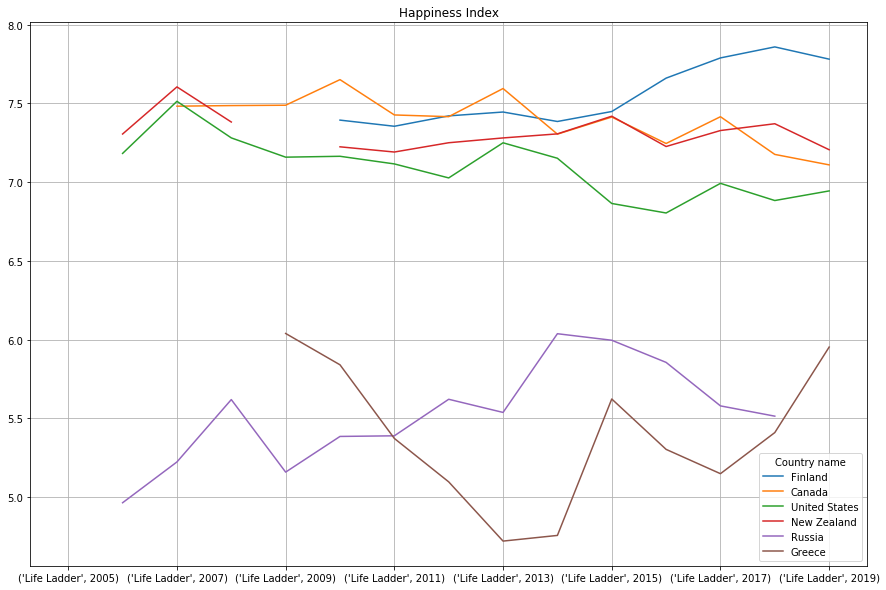

In [7]:
HappyByYears = HappyByYears.transpose()
HappyByYears = HappyByYears.filter(["Finland","Canada","United States","New Zealand","Russia","Greece"], axis=1)
#HappyByYears 
HappyByYears.plot(kind="line", figsize=(15,10), legend = True, grid = True, title ="Happiness Index")
plt.savefig(f"Happiness Score/Images/Happiness By Years.png")

In [8]:
df

,Country name,"('Life Ladder', 2005)","('Life Ladder', 2006)","('Life Ladder', 2007)","('Life Ladder', 2008)","('Life Ladder', 2009)","('Life Ladder', 2010)","('Life Ladder', 2011)","('Life Ladder', 2012)","('Life Ladder', 2013)","('Life Ladder', 2014)","('Life Ladder', 2015)","('Life Ladder', 2016)","('Life Ladder', 2017)","('Life Ladder', 2018)","('Life Ladder', 2019)"
0,Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
1,Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
2,Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,7.169621,6.525146,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803
162,Vietnam,NaN,5.293660,5.421688,5.480425,5.304265,5.295781,5.767344,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451
163,Yemen,NaN,NaN,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913
164,Zambia,NaN,4.824455,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797


In [22]:
Happy_clean_df = df.dropna(thresh=8)
Happy_clean_df

,Country name,"('Life Ladder', 2005)","('Life Ladder', 2006)","('Life Ladder', 2007)","('Life Ladder', 2008)","('Life Ladder', 2009)","('Life Ladder', 2010)","('Life Ladder', 2011)","('Life Ladder', 2012)","('Life Ladder', 2013)","('Life Ladder', 2014)","('Life Ladder', 2015)","('Life Ladder', 2016)","('Life Ladder', 2017)","('Life Ladder', 2018)","('Life Ladder', 2019)"
0,Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
1,Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
2,Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
4,Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561
5,Armenia,NaN,4.289311,4.881516,4.651972,4.177582,4.367811,4.260491,4.319712,4.277191,4.453083,4.348320,4.325472,4.287736,5.062449,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,7.169621,6.525146,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803
162,Vietnam,NaN,5.293660,5.421688,5.480425,5.304265,5.295781,5.767344,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451
163,Yemen,NaN,NaN,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913
164,Zambia,NaN,4.824455,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797


In [23]:
df = file.filter(['Country name','year','Life Ladder'], axis=1)
df

,Country name,year,Life Ladder
0,Afghanistan,2008,3.723590
1,Afghanistan,2009,4.401778
2,Afghanistan,2010,4.758381
3,Afghanistan,2011,3.831719
4,Afghanistan,2012,3.782938
...,...,...,...
1843,Zimbabwe,2015,3.703191
1844,Zimbabwe,2016,3.735400
1845,Zimbabwe,2017,3.638300
1846,Zimbabwe,2018,3.616480


In [29]:
matrix_df = pd.pivot_table(df,index=['Country name'],columns=['year'], aggfunc='sum')             
matrix_df                                 

Life Ladder                                                    \
year                2005      2006      2007      2008      2009      2010   
Country name                                                                 
Afghanistan          NaN       NaN       NaN  3.723590  4.401778  4.758381   
Albania              NaN       NaN  4.634252       NaN  5.485470  5.268937   
Algeria              NaN       NaN       NaN       NaN       NaN  5.463567   
Angola               NaN       NaN       NaN       NaN       NaN       NaN   
Argentina            NaN  6.312925  6.073158  5.961034  6.424133  6.441067   
...                  ...       ...       ...       ...       ...       ...   
Venezuela       7.169621  6.525146       NaN  6.257771  7.188803  7.478455   
Vietnam              NaN  5.293660  5.421688  5.480425  5.304265  5.295781   
Yemen                NaN       NaN  4.477133       NaN  4.809259  4.350313   
Zambia               NaN  4.824455  3.998293  4.730263  5.260361       NaN   
Zimbabwe             NaN  3.826268  3.280247  3.174264  4.055914  4.681570   

                                                                          \
year              2011      2012      2013      2014      2015      2016   
Country name                                                               
Afghanistan   3.831719  3.782938  3.572100  3.130896  3.982855  4.220169   
Albania       5.867422  5.510124  4.550648  4.813763  4.606651  4.511101   
Algeria       5.317194  5.604596       NaN  6.354898       NaN  5.340854   
Angola        5.589001  4.360250  3.937107  3.794838       NaN       NaN   
Argentina     6.775805  6.468387  6.582260  6.671114  6.697131  6.427221   
...                ...       ...       ...       ...       ...       ...   
Venezuela     6.579789  7.066577  6.552796  6.136096  5.568800  4.041115   
Vietnam       5.767344  5.534570  5.022699  5.084923  5.076315  5.062267   
Yemen         3.746256  4.060601  4.217679  3.967958  2.982674  3.825631   
Zambia        4.999114  5.013375  5.243996  4.345837  4.843164  4.347544   
Zimbabwe      4.845642  4.955101  4.690188  4.184451  3.703191  3.735400   

                                            
year              2017      2018      2019  
Country name                                
Afghanistan   2.661718  2.694303  2.375092  
Albania       4.639548  5.004403  4.995318  
Algeria       5.248912  5.043086  4.744627  
Angola             NaN       NaN       NaN  
Argentina     6.039330  5.792797  6.085561  
...                ...       ...       ...  
Venezuela     5.070751  5.005663  5.080803  
Vietnam       5.175279  5.295547  5.467451  
Yemen         3.253560  3.057514  4.196913  
Zambia        3.932777  4.041488  3.306797  
Zimbabwe      3.638300  3.616480  2.693523  

[166 rows x 15 columns]

In [47]:
matrix_df.reset_index().set_index("Country name",inplace=True)
matrix_df

,Country name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
1,Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
2,Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,7.169621,6.525146,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803
162,Vietnam,NaN,5.293660,5.421688,5.480425,5.304265,5.295781,5.767344,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451
163,Yemen,NaN,NaN,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913
164,Zambia,NaN,4.824455,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797


In [50]:
matrix_df.set_index("Country name", inplace=True)

In [51]:
matrix_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country name,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN
Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,7.169621,6.525146,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803
Vietnam,NaN,5.293660,5.421688,5.480425,5.304265,5.295781,5.767344,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451
Yemen,NaN,NaN,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913


In [30]:
matrix_df = pd.DataFrame(matrix_df.to_records()) 
matrix_df

,Country name,"('Life Ladder', 2005)","('Life Ladder', 2006)","('Life Ladder', 2007)","('Life Ladder', 2008)","('Life Ladder', 2009)","('Life Ladder', 2010)","('Life Ladder', 2011)","('Life Ladder', 2012)","('Life Ladder', 2013)","('Life Ladder', 2014)","('Life Ladder', 2015)","('Life Ladder', 2016)","('Life Ladder', 2017)","('Life Ladder', 2018)","('Life Ladder', 2019)"
0,Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
1,Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
2,Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,7.169621,6.525146,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803
162,Vietnam,NaN,5.293660,5.421688,5.480425,5.304265,5.295781,5.767344,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451
163,Yemen,NaN,NaN,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913
164,Zambia,NaN,4.824455,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797


In [31]:
matrix_df.columns = [hdr.replace("('Life Ladder',", "").replace(")", "") \
                     for hdr in matrix_df.columns]
matrix_df

,Country name,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,NaN,NaN,NaN,3.723590,4.401778,4.758381,3.831719,3.782938,3.572100,3.130896,3.982855,4.220169,2.661718,2.694303,2.375092
1,Albania,NaN,NaN,4.634252,NaN,5.485470,5.268937,5.867422,5.510124,4.550648,4.813763,4.606651,4.511101,4.639548,5.004403,4.995318
2,Algeria,NaN,NaN,NaN,NaN,NaN,5.463567,5.317194,5.604596,NaN,6.354898,NaN,5.340854,5.248912,5.043086,4.744627
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,5.589001,4.360250,3.937107,3.794838,NaN,NaN,NaN,NaN,NaN
4,Argentina,NaN,6.312925,6.073158,5.961034,6.424133,6.441067,6.775805,6.468387,6.582260,6.671114,6.697131,6.427221,6.039330,5.792797,6.085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,Venezuela,7.169621,6.525146,NaN,6.257771,7.188803,7.478455,6.579789,7.066577,6.552796,6.136096,5.568800,4.041115,5.070751,5.005663,5.080803
162,Vietnam,NaN,5.293660,5.421688,5.480425,5.304265,5.295781,5.767344,5.534570,5.022699,5.084923,5.076315,5.062267,5.175279,5.295547,5.467451
163,Yemen,NaN,NaN,4.477133,NaN,4.809259,4.350313,3.746256,4.060601,4.217679,3.967958,2.982674,3.825631,3.253560,3.057514,4.196913
164,Zambia,NaN,4.824455,3.998293,4.730263,5.260361,NaN,4.999114,5.013375,5.243996,4.345837,4.843164,4.347544,3.932777,4.041488,3.306797


In [33]:
matrix_df.columns

Index(['Country name', ' 2005', ' 2006', ' 2007', ' 2008', ' 2009', ' 2010',
       ' 2011', ' 2012', ' 2013', ' 2014', ' 2015', ' 2016', ' 2017', ' 2018',
       ' 2019'],
      dtype='object')

In [34]:
matrix_df.sort_values(by=" 2019", ascending=False).set_index('Country name')

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country name,,,,,,,,,,,,,,,
Finland,NaN,7.672449,NaN,7.670627,NaN,7.393264,7.354225,7.420209,7.444636,7.384571,7.447926,7.659843,7.788252,7.858107,7.780348
Switzerland,NaN,7.473253,NaN,NaN,7.524521,NaN,NaN,7.776209,NaN,7.492804,7.572137,7.458520,7.473593,7.508587,7.694221
Denmark,8.018934,NaN,7.834233,7.970892,7.683359,7.770515,7.788232,7.519909,7.588607,7.507559,7.514425,7.557783,7.593702,7.648786,7.693003
Iceland,NaN,NaN,NaN,6.888284,NaN,NaN,NaN,7.590660,7.501394,NaN,7.498071,7.510035,7.476214,NaN,7.532505
Norway,NaN,7.415682,NaN,7.632288,NaN,NaN,NaN,7.678277,NaN,7.444471,7.603434,7.596332,7.578745,7.444262,7.442140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
South Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.831992,4.070771,2.888112,2.816622,NaN,NaN
Sudan,NaN,NaN,NaN,NaN,4.454917,4.435160,4.314456,4.550499,NaN,4.138673,NaN,NaN,NaN,NaN,NaN
Suriname,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.269287,NaN,NaN,NaN,NaN,NaN,NaN,NaN
